In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import community
import random
import plotly.graph_objects as go
import heapq
import numpy as np
from igraph import *
import igraph as ig
from cairo import *

# Set random seed for Python's random module
random.seed(42)

# Set random seed for NumPy
np.random.seed(42)

In [11]:
# Create a color map for the topics
color_map = {'Data System Analysis and Design': 'green', 
             'Robotics': 'yellow',
             'Editorial Content and Prefaces': 'purple',
             'Speech and Audio Processing': 'red',
             'Medical Imaging and Diagnostic Techniques': 'blue',
             'Facial Recognition': 'orange'} 

# Map the assigned topics to their names
df_topic = pd.read_csv("/Users/zy/Documents/GitHub/Social-Media-Analysis-Project/Group Project/Topic Modeling and Results/cleaned_data_with_topics.csv")

# Convert 'id' and 'references' to string and drop rows with NaN values in 'id' or 'assigned_topic_name'
df_topic = df_topic.dropna(subset=['id', 'assigned_topic_name', 'references'])
df_topic = df_topic.sample(n=100, random_state=42)  # Set a random state for reproducibility

df_topic['id'] = df_topic['id'].astype(str)
df_topic['references'] = df_topic['references'].astype(str)

# Now you can use 'assigned_topic_name' in your code
exploded_data = df_topic.explode('references')
reference_doc = pd.concat([df_topic.loc[:,['id', 'assigned_topic_name']].drop_duplicates(), 
                           exploded_data.loc[:, ['references', 'assigned_topic_name']].rename(columns = {'references': 'id'})],
                          axis = 0).sort_values(by=['id'])

reference_list = list(reference_doc['id'].values)
topic_list = list(reference_doc['assigned_topic_name'].values)
count = len(reference_list)

In [12]:
# Create an empty graph
references_graph = Graph(directed = False)

# Add vertices to the graph (assuming vertices are already added)
references_graph.add_vertices(count)

references_graph.vs['assigned_topic_name'] = topic_list

In [13]:
# Function to add edges between vertices
def add_edge(row):
    # Get the index of the 'id' vertex
    id_index = reference_list.index(row['id'])
    # Get the index of the 'references' vertex
    references_index = reference_list.index(row['references'])
    # Add an edge between the vertices
    references_graph.add_edge(id_index, references_index)
    return row['id'], row['references']

In [14]:
# Function to add edges between vertices
def add_edges(graph, edges):
    for edge in edges:
        graph.add_edge(*edge)

# List of edges (each edge represented as a tuple of vertex indices)
edges = [(reference_list.index(row['id']), reference_list.index(row['references'])) for _, row in exploded_data.iterrows()]

# Add edges to the graph
add_edges(references_graph, edges)

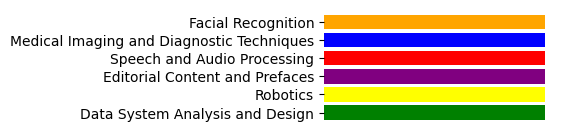

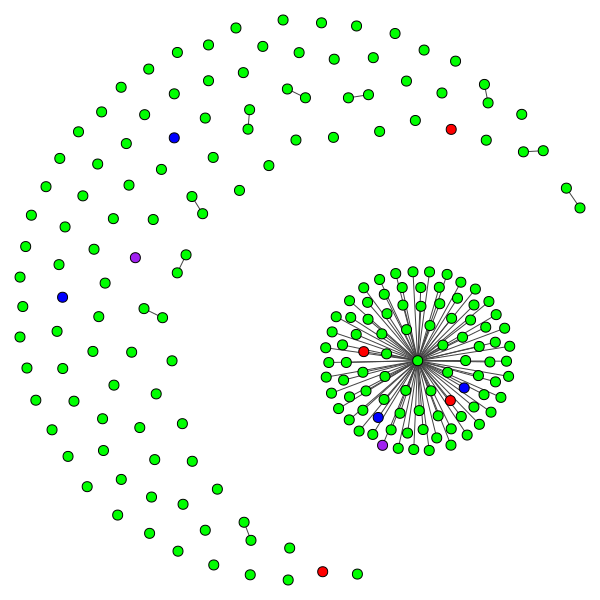

In [15]:
x = list(str(i) for i in color_map.keys())
y = [5 for i in range(len(x))]
fig = plt.figure(figsize = (3,1.5))
ax1 = plt.axes(frameon=False)
ax1.axes.get_xaxis().set_visible(False)
plt.barh(x,y, 
         color = list(color_map.values()))
plt.show()

references_graph.vs["color"] = [color_map.get(topic_name, 'black') for topic_name in references_graph.vs["assigned_topic_name"]]
ig.plot(references_graph, vertex_size=10)